In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions 

In [3]:
def evaluation(y_true, y_pred, title = ""):
    """
    This function is used to compute the confusion matrix 
    and other evaluation metrics.
    """
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix for {}: \n'.format(title), cm)
    total = sum(sum(cm))
    
    print('=============')
    accuracy = (cm[0,0] + cm[1,1]) /total
    print ('Accuracy    : {}'.format(accuracy))
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    print('Specificity :  {}'.format(Specificity))
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    print('Sensitivity :  {}'.format(sensitivity))
    
    
def plot_swarm(x, y, df):
    sns.set()
    sns.swarmplot(x=x, y = y, data = df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

### EDA 

### 1. users data 
- no duplicates in user_id
- non-null objects

In [4]:
user_df = pd.read_csv("users.csv")
user_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [5]:
user_df["install_date"] = pd.to_datetime(user_df["install_date"])

In [6]:
user_df["user_id"].nunique()

22576

In [7]:
user_df.shape[0] == user_df["user_id"].nunique()

True

In [8]:
display(user_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       22576 non-null  int64         
 1   install_date  22576 non-null  datetime64[ns]
 2   lang          22576 non-null  object        
 3   country       22564 non-null  object        
 4   hw_ver        22576 non-null  object        
 5   os_ver        22576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.0+ MB


None

### 2. sessions data 

In [9]:
sessions_df = pd.read_csv("sessions.csv")
sessions_df.head()

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
1,14067,2019-03-01 00:22:27,2019-03-01,2,NaN
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN


In [43]:
sessions_df["last_session_termination_type"].unique()

array([nan])

In [10]:
sessions_df["date"] = pd.to_datetime(sessions_df["date"])

In [11]:
sessions_df[sessions_df.user_id == 16275]

,user_id,ts,date,session_num,last_session_termination_type
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN
5,16275,2019-03-01 01:49:31,2019-03-01,4,NaN
6,16275,2019-03-01 02:06:51,2019-03-01,4,NaN
7,16275,2019-03-01 03:10:40,2019-03-01,5,NaN
14,16275,2019-03-01 07:34:08,2019-03-01,6,NaN
15,16275,2019-03-01 08:00:41,2019-03-01,7,NaN
16,16275,2019-03-01 08:31:34,2019-03-01,8,NaN
194,16275,2019-03-02 12:32:21,2019-03-02,9,NaN


In [12]:
sessions_df.drop_duplicates().shape

(722831, 5)

In [13]:
sessions_df.shape

(722955, 5)

### 3. iaps data 

In [14]:
iaps_df = pd.read_csv("iaps.csv") ## this is for game adminitratiion's side
iaps_df.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [15]:
iaps_df["date"] = pd.to_datetime(iaps_df["date"])

In [16]:
iaps_df.shape

(6685, 6)

In [17]:
iaps_df.user_id.nunique()

1526

In [18]:
iaps_df[iaps_df.user_id == 2062].sort_values(by="ts") 

,user_id,ts,date,prod_name,prod_type,rev
3795,2062,2019-03-03 03:50:45,2019-03-03,iap_1_gems_2,gems,760
3796,2062,2019-03-03 03:50:58,2019-03-03,iap_1_gems_2,gems,760
3797,2062,2019-03-03 04:01:32,2019-03-03,iap_1_passes_2,chapterPasses,760
3798,2062,2019-03-03 04:07:34,2019-03-03,iap_1_gems_2,gems,760
3799,2062,2019-03-03 10:40:27,2019-03-03,iap_1_passes_2,chapterPasses,760


<AxesSubplot:>

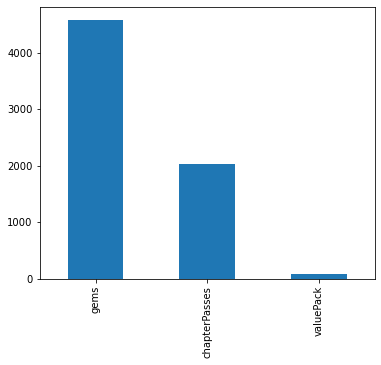

In [19]:
dfg = iaps_df['prod_type'].value_counts()
dfg.plot(kind='bar', figsize=(6, 5))


### 4. spendevents data 

In [20]:
spending_df = pd.read_csv("spendevents.csv")
spending_df.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [39]:
spending_df["currency"].unique()

array(['gems'], dtype=object)

In [21]:
spending_df["date"] = pd.to_datetime(spending_df["date"])

In [22]:
spending_df[spending_df.user_id == 2062].sort_values(by="ts") ### this is for game adminitratiion's side

,user_id,ts,date,story,chapter,spendtype,currency,amount
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27


In [63]:
spending_df.shape

(107764, 8)

# Graphical EDA and insights 

### 1. Find the golden time 
- how long does it take for a new user to make the firsr in-app purchase
- from the plot, we can see that almost 90% of new users make their first in-app purchase within the first 10 days. 
- The minority of the new users convert slowly within 60 days. 
- We should not send out the promotion within the first 7 days, since high potential users will make purchase on that day. Sure things (or always-takers) are customers who were always going to buy the product, regardless of whether or not they received a marketing intervention. Hence, we don't want them to  take advantage of the sale instead of
paying full price. However, sending promotion occasionally will make them happier. 
- We will be learning the behavior of users who make purchases after 7 days. Those are the ones who may think twice about purchasing the and marketing intervention will push them towards making purchases. 

- When will we consider a payer as non-payer? from what we see in the data, we 
- We may want to figure out how mnay minutes it takes make the first purchase in the first day

In [23]:
users_iaps = pd.merge(user_df, iaps_df, on = "user_id")
users_iaps

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410
...,...,...,...,...,...,...,...,...,...,...,...
6680,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:39:35,2019-03-11,iap_1_gems_2,gems,760
6681,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:42:20,2019-03-11,iap_1_gems_2,gems,760
6682,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:12,2019-03-20,iap_1_gems_2,gems,760
6683,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:49,2019-03-20,iap_1_passes_2,chapterPasses,760


In [24]:
users_iaps[users_iaps.user_id == 36]

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410
5,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:58,2019-03-02,iap_1_gems_1,gems,410
6,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:37:46,2019-03-02,iap_1_gems_2,gems,760
7,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:47:54,2019-03-02,iap_1_passes_5,chapterPasses,1810
8,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:03:26,2019-03-03,iap_1_gems_1,gems,410
9,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:04:04,2019-03-03,iap_1_gems_2,gems,760


In [25]:
users_iaps["days_to_first_purchase"] = users_iaps["date"] - users_iaps["install_date"]
users_iaps["days_to_first_purchase"] = users_iaps["days_to_first_purchase"].dt.days
users_iaps.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760,2
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760,3
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0


In [26]:
users_iaps["rank"] = users_iaps.groupby(["user_id"])["days_to_first_purchase"].rank(method="first", ascending=True)
users_iaps["rank"] = users_iaps["rank"].astype(int)
users_iaps.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase,rank
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2,1
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760,2,2
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760,3,3
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0,1


In [27]:
paying_users_df = users_iaps[users_iaps["rank"]==1]
paying_users_df.shape

(1526, 13)

Text(0.5, 1.0, 'ECDF plot of number of days it takes users to their first purchase')

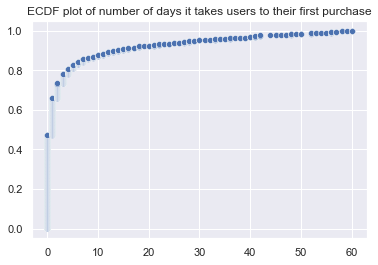

In [28]:
sns.set()
x_ecdf, y_ecdf = ecdf(paying_users_df["days_to_first_purchase"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of number of days it takes users to their first purchase")

In [71]:
paying_users_df.shape[0]==paying_users_df["user_id"].nunique()

True

In [67]:
first_iap_day_df = paying_users_df

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase,rank
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2,1


#### 2. Level of the first purchase 

In [45]:
users_spends_df = pd.merge(user_df, spending_df, on = "user_id")
users_spends_IAP_df = users_spends_df[users_spends_df.spendtype == 'IAP']
print(users_spends_IAP_df.shape)
users_spends_IAP_df.head(2)

(4915, 13)


,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount
5,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,story_1,2,IAP,gems,-73
54,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:06,2019-03-09,story_1,11,IAP,gems,-73


In [46]:
users_spends_IAP_df["days_to_first_purchase"] = users_spends_IAP_df["date"] - users_spends_IAP_df["install_date"]
users_spends_IAP_df["days_to_first_purchase"] = users_spends_IAP_df["days_to_first_purchase"].dt.days

C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
users_spends_IAP_df["user_id"].nunique()

1181

In [57]:
users_spends_IAP_df[users_spends_IAP_df.user_id == 36]

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount,days_to_first_purchase
126,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,story_1,3,IAP,gems,-37,0
127,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:58,2019-03-02,story_1,3,IAP,gems,-37,0
129,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:37:46,2019-03-02,story_1,3,IAP,gems,-73,0
131,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:03:26,2019-03-03,story_1,5,IAP,gems,-37,1
132,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:04:04,2019-03-03,story_1,5,IAP,gems,-73,1


In [61]:
users_spends_IAP_df["rank"] = users_spends_IAP_df.groupby(['user_id'])['days_to_first_purchase'].rank(method="first", ascending=True)
users_spends_IAP_df["rank"] = users_spends_IAP_df["rank"].astype(int)
users_spends_IAP_df = users_spends_IAP_df[users_spends_IAP_df["rank"]==1]
users_spends_IAP_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount,days_to_first_purchase,rank
5,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,story_1,2,IAP,gems,-73,1,1
54,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:06,2019-03-09,story_1,11,IAP,gems,-73,2,1
126,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,story_1,3,IAP,gems,-37,0,1
178,51,2019-03-02,en,US,"iPhone7,2",9.2.1,2019-03-02 22:38:53,2019-03-03,story_1,16,IAP,gems,-73,1,1
253,85,2019-03-07,en,US,"iPhone6,1",9.2,2019-04-17 18:26:44,2019-04-17,story_2,2,IAP,gems,-73,41,1


Text(0.5, 1.0, 'ECDF plot of current chapter at their first purchase')

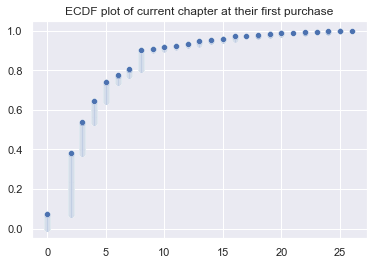

In [62]:
sns.set()
x_ecdf, y_ecdf = ecdf(users_spends_IAP_df["chapter"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of current chapter at their first purchase")

In [50]:
users_spends_IAP_df["user_id"].nunique()

1181

In [36]:
users_spends_df[users_spends_df["spendtype"]=='valuepack'].shape

(39, 13)

In [29]:
#### 3. Gems when making the first purchase 

In [30]:
users_iaps.shape

(6685, 13)

In [31]:
iaps_df.shape

(6685, 6)

In [ ]:
###

### 2. Let segment paying users into different group, and analyze their behavior 

In [95]:
### 2. On average, how many in-app purchase new users make, if they make their first purchase after the first 10 days 

In [96]:
zero_day_iap_df = paying_users_df[paying_users_df.days_to_first_purchase == 0]
two_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase == 2) | \
                                 (paying_users_df.days_to_first_purchase == 1)]

three_to_5_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 3) \
                                        & (paying_users_df.days_to_first_purchase <= 5)]
six_to_10_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 6) \
                                        & (paying_users_df.days_to_first_purchase <= 10)]
ten_than_20_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 11) \
                                        & (paying_users_df.days_to_first_purchase <= 20)]

In [97]:
paying_users_df[paying_users_df.days_to_first_purchase <= 2].shape[0] / paying_users_df.shape[0]

0.7332896461336829

In [98]:
print(six_to_10_day_iap_df.shape)
more_than_10_day_iap_df.shape

(74, 13)


(70, 13)

#### analyze group 3-5 days iap

In [101]:
print(three_to_5_day_iap_df.shape)
three_to_5_day_iap_df.head()

(10906, 17)


,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,rev,days_to_first_purchase,rank,ts_y,date_y,session_num,last_session_termination_type
0,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN
1,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:02:50,2019-03-07,2,NaN
2,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:03:36,2019-03-07,3,NaN
3,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:55:52,2019-03-07,4,NaN
4,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 06:00:41,2019-03-07,5,NaN


In [102]:
three_to_5_day_iap_df = pd.merge(three_to_5_day_iap_df, sessions_df, on = "user_id")
three_to_5_day_iap_df.shape

(1681712, 21)

In [103]:
three_to_5_day_iap_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,...,days_to_first_purchase,rank,ts_y,date_y,session_num_x,last_session_termination_type_x,ts,date,session_num_y,last_session_termination_type_y
0,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 04:20:24,2019-03-07,1,NaN
1,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:02:50,2019-03-07,2,NaN
2,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:03:36,2019-03-07,3,NaN
3,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:55:52,2019-03-07,4,NaN
4,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 06:00:41,2019-03-07,5,NaN


In [82]:
three_to_5_day_iap_df["days_from_installing"] = three_to_5_day_iap_df["date_y"] - three_to_5_day_iap_df["date_x"]
df_sessions_3_5_iap_df = three_to_5_day_iap_df[three_to_5_day_iap_df["days_from_installing"] <= 4
idx = three_to_5_day_iap_df.groupby(['user_id'])['session_num'].transform(max) == three_to_5_day_iap_df['session_num']
three_to_5_day_iap_df[idx]

,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,rev,days_to_first_purchase,rank,ts_y,date_y,session_num,last_session_termination_type
66,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-16 23:19:11,2019-03-16,68,NaN
148,785,2019-03-07,en,GB,"iPad2,7",9.2,2019-03-10 18:24:22,2019-03-10,iap_1_gems_5,gems,1810,3,1,2019-05-05 17:07:54,2019-05-05,80,NaN
162,868,2019-03-04,en,US,"iPad4,1",9.2.1,2019-03-07 17:54:10,2019-03-07,iap_1_gems_2,gems,760,3,1,2019-03-12 07:45:18,2019-03-12,15,NaN
182,888,2019-03-06,en,CA,"iPad2,5",8.3,2019-03-09 18:53:33,2019-03-09,iap_1_gems_2,gems,760,3,1,2019-03-14 10:57:49,2019-03-14,20,NaN
340,916,2019-03-06,en,AU,"iPhone6,2",9.2,2019-03-09 02:17:14,2019-03-09,iap_1_gems_2,gems,760,3,1,2019-04-01 20:06:11,2019-04-01,159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,21842,2019-03-06,en,US,"iPhone7,2",9.2,2019-03-11 17:10:41,2019-03-11,iap_1_gems_2,gems,760,5,1,2019-03-29 20:38:03,2019-03-29,57,NaN
10617,22085,2019-03-01,en,GB,"iPhone7,1",9.1,2019-03-04 06:33:22,2019-03-04,iap_1_passes_2,chapterPasses,760,3,1,2019-03-23 12:15:41,2019-03-23,80,NaN
10635,22323,2019-03-03,en,US,"iPod5,1",9.2.1,2019-03-07 13:58:37,2019-03-07,iap_1_passes_1,chapterPasses,410,4,1,2019-03-21 13:35:50,2019-03-21,18,NaN
10819,22370,2019-03-04,en,BE,"iPhone6,2",9.2,2019-03-08 00:48:03,2019-03-08,iap_1_passes_2,chapterPasses,760,4,1,2019-05-01 18:18:24,2019-05-01,182,NaN


<AxesSubplot:>

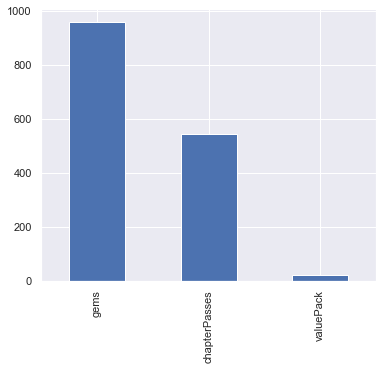

In [ ]:
### 1. Amount of gems left when making purchase and level
### 2. Find the main difference features/distribution ft that seperates two groups well 
### 3. Cluster according that features
### 4. 

In [ ]:
# Model 
- Paying users are class 1 
- Non-paying users are class 0
- build features 